<a href="https://colab.research.google.com/github/muhraffibr/Tugas-Besar-Kecerdasan-Buatan/blob/main/TUBES_AI_KEL_8_TK_47_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BASELINE LINEAR REGRESSION - STUDENT PERFORMANCE PREDICTION

Loading dataset...
✓ Dataset loaded: 493 rows, 16 columns
EXPLORATORY DATA ANALYSIS

1. DATASET INFO
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 

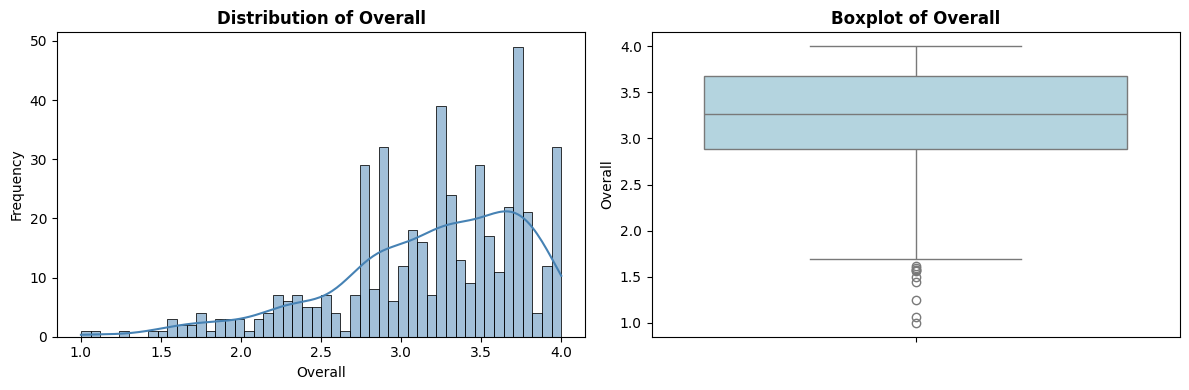

Mean   : 3.19
Median : 3.27
Std    : 0.59
Min    : 1.00
Max    : 4.00

6. CORRELATION ANALYSIS
--------------------------------------------------------------------------------


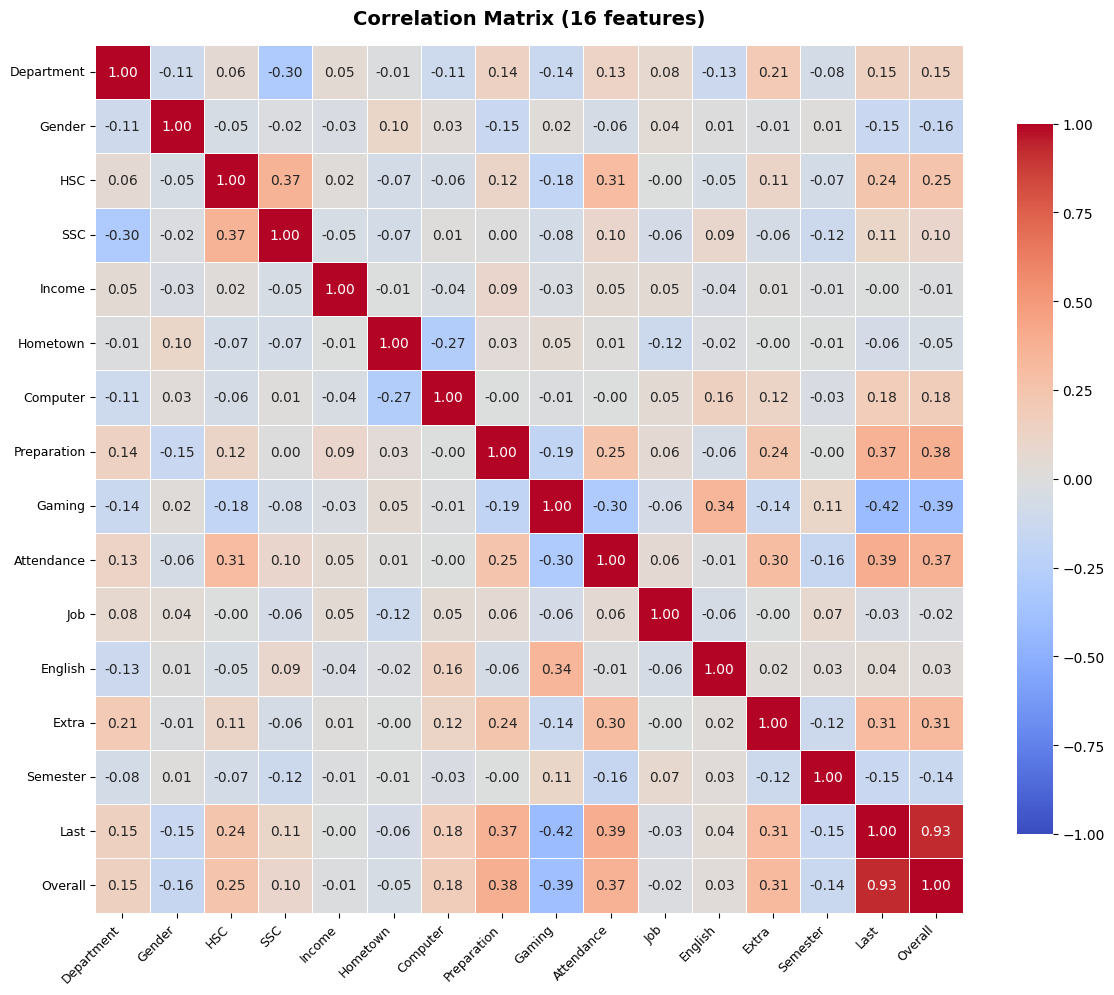


Top 10 correlations with Overall:
--------------------------------------------------------------------------------
 1. Overall                          :  1.0000
 2. Last                             :  0.9251
 3. Preparation               (cat)  :  0.3841
 4. Attendance                (cat)  :  0.3686
 5. Extra                     (cat)  :  0.3137
 6. HSC                              :  0.2520
 7. Computer                         :  0.1775
 8. Department                (cat)  :  0.1509
 9. SSC                              :  0.0987
10. English                          :  0.0301


DATA PREPROCESSING

1. MISSING VALUES
--------------------------------------------------------------------------------
Dropped 0 rows → 493 remaining

2. ENCODING CATEGORICAL
--------------------------------------------------------------------------------
  ✓ Department: 10 categories
  ✓ Gender: 2 categories
  ✓ Income: 10 categories
  ✓ Hometown: 2 categories
  ✓ Preparation: 3 categories
  ✓ Gaming: 3 cate

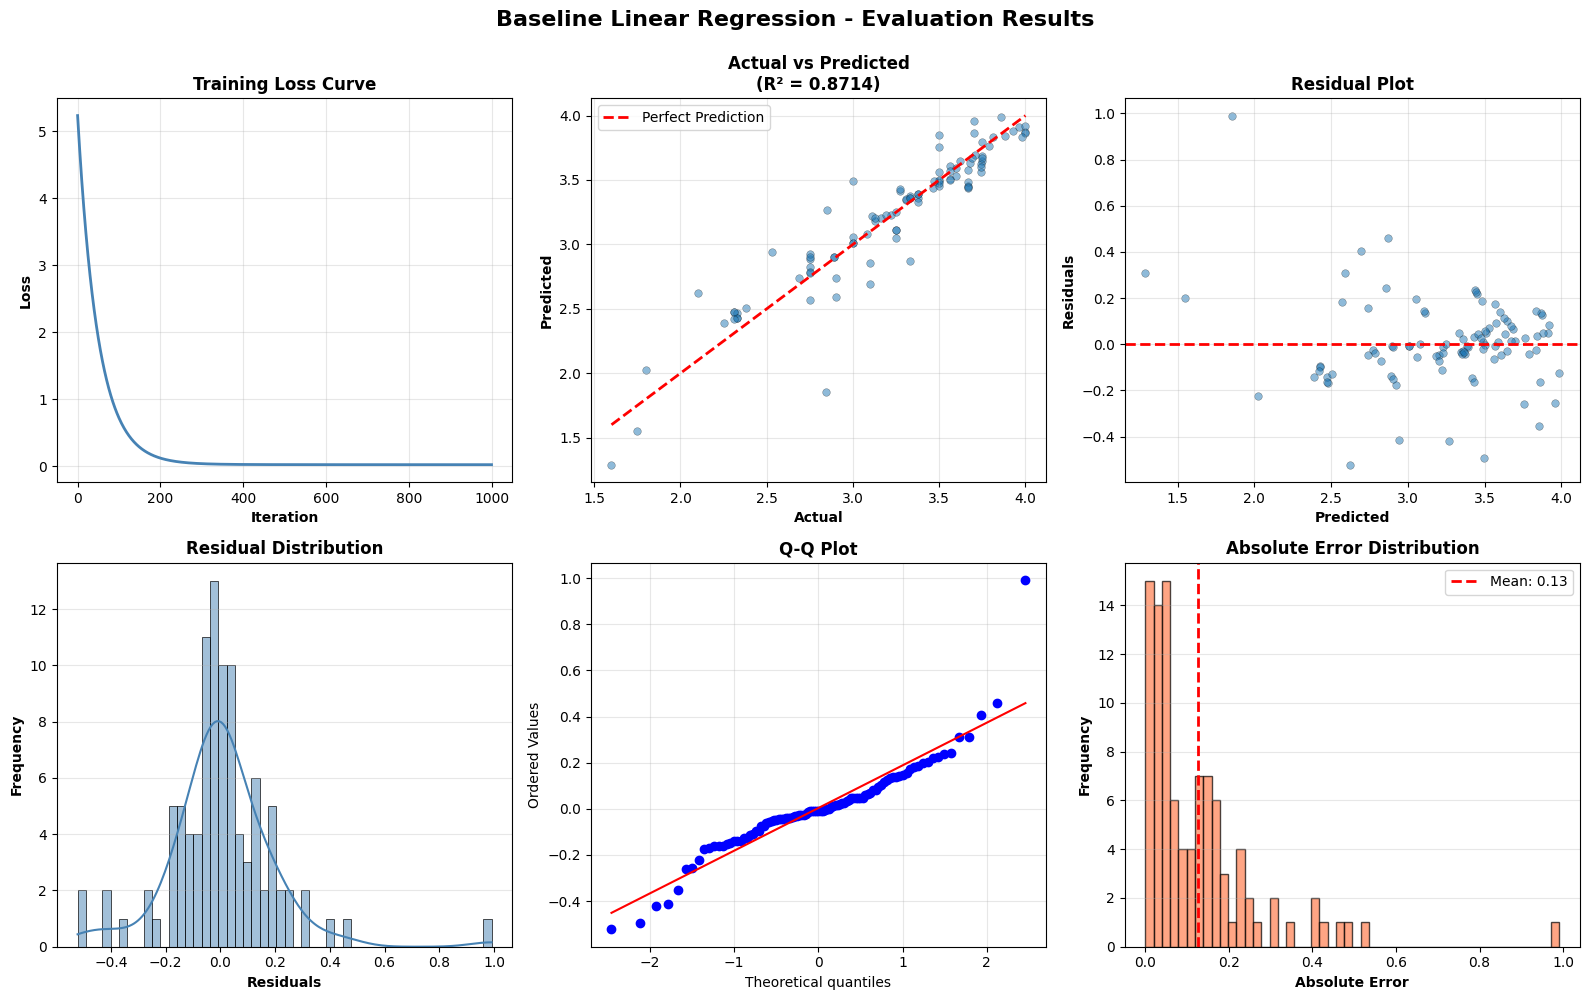



COEFFICIENT ANALYSIS

Intercept: 3.1784

Feature Importance (by coefficient magnitude):
--------------------------------------------------------------------------------
Rank  Feature                       Coefficient    Impact
--------------------------------------------------------------------------------
1     Last                                  0.5297  Positive ↑
2     Preparation                           0.0250  Positive ↑
3     Extra                                 0.0213  Positive ↑
4     Semester                             -0.0177  Negative ↓
5     Gender                               -0.0171  Negative ↓
6     HSC                                   0.0125  Positive ↑
7     Computer                              0.0113  Positive ↑
8     English                               0.0090  Positive ↑
9     Attendance                           -0.0087  Negative ↓
10    Income                               -0.0076  Negative ↓
11    Job                                   0.0070  Positive

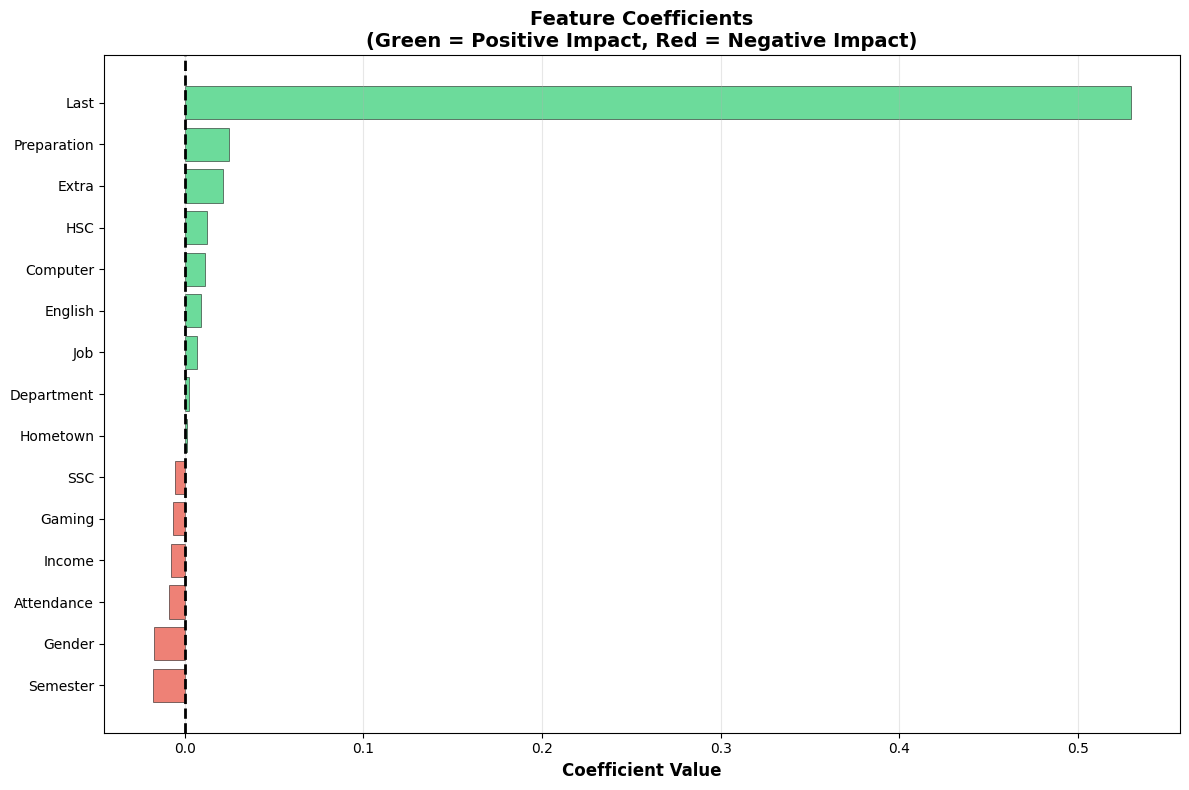



REGRESSION EQUATION

Ŷ = 3.1784
    + (0.0022 × Department)
    - (0.0171 × Gender)
    + (0.0125 × HSC)
    - (0.0051 × SSC)
    - (0.0076 × Income)
    + (0.0014 × Hometown)
    + (0.0113 × Computer)
    + (0.0250 × Preparation)
    - (0.0067 × Gaming)
    - (0.0087 × Attendance)
    + (0.0070 × Job)
    + (0.0090 × English)
    + (0.0213 × Extra)
    - (0.0177 × Semester)
    + (0.5297 × Last)


ANALYSIS COMPLETED

Model Performance:
  R² Score      : 0.8714
  Adjusted R²   : 0.8482
  MAE           : 0.1269
  RMSE          : 0.1929

Model explains 87.14% of variance in student performance


In [ ]:
# ============================================================
# STUDENT PERFORMANCE PREDICTION - BASELINE LINEAR REGRESSION
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ============================================================
# CONFIG
# ============================================================

DATASET_URL = "https://data.mendeley.com/public-files/datasets/5b82ytz489/files/21461ab8-2eb2-4768-9551-5636024f2989/file_downloaded"
TARGET_COLUMN = "Overall"
LEARNING_RATE = 0.01
N_ITERATIONS = 1000
RANDOM_SEED = 42


# ============================================================
# MODEL CLASS
# ============================================================

class BaselineLinearRegression:

    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.W = None
        self.b = 0
        self.losses = []
        self.encoders = {}
        self.features = None
        self.X_mean = None
        self.X_std = None

    # --------------------------------------------------------
    # LOAD DATA
    # --------------------------------------------------------
    def load_data(self, url):
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        return df

    # --------------------------------------------------------
    # EDA (EXPLORATORY DATA ANALYSIS)
    # --------------------------------------------------------
    def exploratory_analysis(self, df, target):
        print("=" * 80)
        print("EXPLORATORY DATA ANALYSIS")
        print("=" * 80)

        print("\n1. DATASET INFO")
        print("-" * 80)
        print(df.info())

        print("\n2. DESCRIPTIVE STATISTICS")
        print("-" * 80)
        print(df.describe().T)

        print("\n3. MISSING VALUES")
        print("-" * 80)
        missing = df.isnull().sum().to_frame('missing_count')
        print(missing[missing['missing_count'] > 0])
        if missing['missing_count'].sum() == 0:
            print("✓ No missing values found!")

        print("\n4. DUPLICATE DATA")
        print("-" * 80)
        duplicates = df.duplicated().sum()
        print(f"Jumlah data duplikat: {duplicates}")
        if duplicates > 0:
            print(f"Menghapus {duplicates} data duplikat...")
            df = df.drop_duplicates()

        # Target variable analysis
        if target in df.columns:
            print(f"\n5. TARGET VARIABLE ANALYSIS: {target}")
            print("-" * 80)

            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            sns.histplot(df[target], bins=50, ax=axes[0], kde=True, color='steelblue')
            axes[0].set_title(f'Distribution of {target}', fontweight='bold')
            axes[0].set_xlabel(target)
            axes[0].set_ylabel('Frequency')

            sns.boxplot(y=df[target], ax=axes[1], color='lightblue')
            axes[1].set_title(f'Boxplot of {target}', fontweight='bold')
            axes[1].set_ylabel(target)

            plt.tight_layout()
            plt.show()

            print(f"Mean   : {df[target].mean():.2f}")
            print(f"Median : {df[target].median():.2f}")
            print(f"Std    : {df[target].std():.2f}")
            print(f"Min    : {df[target].min():.2f}")
            print(f"Max    : {df[target].max():.2f}")

        # Correlation analysis
        print(f"\n6. CORRELATION ANALYSIS")
        print("-" * 80)

        df_encoded = df.copy()
        cat_cols = df_encoded.select_dtypes(include="object").columns
        temp_encoders = {}

        for col in cat_cols:
            if col != target:
                le = LabelEncoder()
                df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
                temp_encoders[col] = le

        correlation = df_encoded.corr()
        n_features = len(correlation.columns)

        plt.figure(figsize=(max(12, n_features * 0.5), max(10, n_features * 0.45)))

        sns.heatmap(correlation, annot=n_features <= 20, cmap='coolwarm',
                   center=0, fmt='.2f', square=True, linewidths=0.5,
                   cbar_kws={'shrink': 0.8}, vmin=-1, vmax=1)

        plt.title(f'Correlation Matrix ({n_features} features)',
                 fontsize=14, fontweight='bold', pad=15)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()

        if target in correlation.columns:
            target_corr = correlation[target].sort_values(ascending=False)
            print(f"\nTop 10 correlations with {target}:")
            print("-" * 80)
            for idx, (feature, corr_value) in enumerate(target_corr.head(10).items(), 1):
                marker = " (cat)" if feature in temp_encoders else ""
                print(f"{idx:2d}. {feature:25s}{marker:7s} : {corr_value:7.4f}")

        print("\n" + "=" * 80)
        return df

    # --------------------------------------------------------
    # PREPROCESSING
    # --------------------------------------------------------
    def preprocess(self, df, target):
        print("\n" + "=" * 80)
        print("DATA PREPROCESSING")
        print("=" * 80)

        # 1. Handle missing values
        print("\n1. MISSING VALUES")
        print("-" * 80)
        before = len(df)
        df = df.dropna().copy()
        after = len(df)
        print(f"Dropped {before - after} rows → {after} remaining")

        # 2. Encode categorical
        print("\n2. ENCODING CATEGORICAL")
        print("-" * 80)
        cat_cols = [c for c in df.select_dtypes(include="object").columns if c != target]

        for col in cat_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            self.encoders[col] = le
            print(f"  ✓ {col}: {len(le.classes_)} categories")

        # 3. Train-test split
        print("\n3. TRAIN-TEST SPLIT")
        print("-" * 80)

        X = df.drop(columns=[target]).values
        y = df[target].values.reshape(-1, 1)
        self.features = df.drop(columns=[target]).columns.tolist()

        np.random.seed(RANDOM_SEED)
        idx = np.random.permutation(len(X))
        split = int(0.8 * len(X))

        X_train, X_test = X[idx[:split]], X[idx[split:]]
        y_train, y_test = y[idx[:split]], y[idx[split:]]

        print(f"Train: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
        print(f"Test : {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

        print("\n" + "=" * 80)
        return X_train, X_test, y_train, y_test

    # --------------------------------------------------------
    # MODEL TRAINING
    # --------------------------------------------------------
    def train(self, X_train, y_train):
        print("\n" + "=" * 80)
        print("TRAINING BASELINE LINEAR REGRESSION")
        print("=" * 80)

        # Normalize data to prevent overflow
        self.X_mean = X_train.mean(axis=0)
        self.X_std = X_train.std(axis=0)
        self.X_std[self.X_std == 0] = 1

        X_train_norm = (X_train - self.X_mean) / self.X_std

        print(f"\nApplied normalization:")
        print(f"  Original X range: [{X_train.min():.2f}, {X_train.max():.2f}]")
        print(f"  Normalized X range: [{X_train_norm.min():.2f}, {X_train_norm.max():.2f}]")

        n_samples, n_features = X_train_norm.shape
        self.W = np.zeros((n_features, 1))
        self.b = 0
        self.losses = []

        print(f"\nTraining with:")
        print(f"  Learning rate: {self.lr}")
        print(f"  Iterations: {self.epochs}")
        print(f"  Features: {n_features}")
        print(f"  Samples: {n_samples}")
        print("\nTraining progress:")
        print("-" * 80)

        for i in range(self.epochs):
            # Forward pass
            y_hat = X_train_norm @ self.W + self.b
            error = y_hat - y_train

            # Check for overflow
            if np.any(np.isnan(error)) or np.any(np.isinf(error)):
                print(f"\n⚠ Overflow detected at iteration {i}")
                print(f"  Stopping training early")
                break

            # Compute gradients
            dW = (X_train_norm.T @ error) / n_samples
            db = np.sum(error) / n_samples

            # Update parameters
            self.W -= self.lr * dW
            self.b -= self.lr * db

            # Compute loss
            loss = np.mean(error ** 2) / 2
            self.losses.append(loss)

            if i % 200 == 0:
                print(f"Iteration {i:4d} | Loss: {loss:.6f}")

        print("\n✓ Training completed")

    # --------------------------------------------------------
    # EVALUATION
    # --------------------------------------------------------
    def evaluate(self, X_test, y_test):
        print("\n" + "=" * 80)
        print("MODEL EVALUATION")
        print("=" * 80)

        # Normalize test data using training statistics
        X_test_norm = (X_test - self.X_mean) / self.X_std

        # Predictions
        y_pred = X_test_norm @ self.W + self.b

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        n, p = X_test.shape
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print("\nPerformance Metrics:")
        print("-" * 80)
        print(f"R² Score        : {r2:.4f}")
        print(f"Adjusted R²     : {adj_r2:.4f}")
        print(f"MAE             : {mae:.4f}")
        print(f"MSE             : {mse:.4f}")
        print(f"RMSE            : {rmse:.4f}")

        # Sample predictions
        print("\n" + "-" * 80)
        print("SAMPLE PREDICTIONS (First 10):")
        print("-" * 80)
        sample_df = pd.DataFrame({
            'Actual': y_test[:10].flatten().round(2),
            'Predicted': y_pred[:10].flatten().round(2),
            'Error': (y_test[:10] - y_pred[:10]).flatten().round(2)
        })
        print(sample_df.to_string(index=False))

        # Visualizations
        self._plot_results(y_test, y_pred, r2)

        print("\n" + "=" * 80)
        return r2, adj_r2, mae, rmse

    def _plot_results(self, y_test, y_pred, r2):
        """Plot evaluation results"""
        fig = plt.figure(figsize=(16, 10))

        # 1. Training Loss
        plt.subplot(2, 3, 1)
        plt.plot(self.losses, color='steelblue', linewidth=2)
        plt.xlabel('Iteration', fontweight='bold')
        plt.ylabel('Loss', fontweight='bold')
        plt.title('Training Loss Curve', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # 2. Actual vs Predicted
        plt.subplot(2, 3, 2)
        plt.scatter(y_test, y_pred, alpha=0.5, s=30, edgecolors='k', linewidths=0.3)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
        plt.xlabel('Actual', fontweight='bold')
        plt.ylabel('Predicted', fontweight='bold')
        plt.title(f'Actual vs Predicted\n(R² = {r2:.4f})', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 3. Residual Plot
        plt.subplot(2, 3, 3)
        residuals = (y_test - y_pred).flatten()
        plt.scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='k', linewidths=0.3)
        plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
        plt.xlabel('Predicted', fontweight='bold')
        plt.ylabel('Residuals', fontweight='bold')
        plt.title('Residual Plot', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # 4. Residual Distribution
        plt.subplot(2, 3, 4)
        sns.histplot(residuals, bins=50, kde=True, color='steelblue')
        plt.xlabel('Residuals', fontweight='bold')
        plt.ylabel('Frequency', fontweight='bold')
        plt.title('Residual Distribution', fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')

        # 5. Q-Q Plot
        from scipy import stats
        plt.subplot(2, 3, 5)
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title('Q-Q Plot', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # 6. Error Distribution
        plt.subplot(2, 3, 6)
        errors = np.abs(residuals)
        plt.hist(errors, bins=50, color='coral', alpha=0.7, edgecolor='black')
        plt.xlabel('Absolute Error', fontweight='bold')
        plt.ylabel('Frequency', fontweight='bold')
        plt.title('Absolute Error Distribution', fontweight='bold')
        plt.axvline(errors.mean(), color='r', linestyle='--', linewidth=2,
                   label=f'Mean: {errors.mean():.2f}')
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')

        plt.suptitle('Baseline Linear Regression - Evaluation Results',
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

    # --------------------------------------------------------
    # COEFFICIENT ANALYSIS
    # --------------------------------------------------------
    def analyze_coefficients(self):
        print("\n" + "=" * 80)
        print("COEFFICIENT ANALYSIS")
        print("=" * 80)

        coef_df = pd.DataFrame({
            'Feature': self.features,
            'Coefficient': self.W.flatten(),
            'Abs_Coefficient': np.abs(self.W.flatten())
        }).sort_values('Abs_Coefficient', ascending=False)

        print(f"\nIntercept: {self.b:.4f}")
        print("\nFeature Importance (by coefficient magnitude):")
        print("-" * 80)
        print(f"{'Rank':<6}{'Feature':<30}{'Coefficient':<15}{'Impact'}")
        print("-" * 80)

        for i, (_, row) in enumerate(coef_df.iterrows(), 1):
            impact = "Positive ↑" if row['Coefficient'] > 0 else "Negative ↓"
            print(f"{i:<6}{row['Feature']:<30}{row['Coefficient']:>14.4f}  {impact}")

        # Visualization
        plt.figure(figsize=(12, max(8, len(coef_df) * 0.3)))
        colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_df.sort_values('Coefficient')['Coefficient']]

        plt.barh(coef_df.sort_values('Coefficient')['Feature'],
                coef_df.sort_values('Coefficient')['Coefficient'],
                color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
        plt.xlabel('Coefficient Value', fontweight='bold', fontsize=12)
        plt.title('Feature Coefficients\n(Green = Positive Impact, Red = Negative Impact)',
                 fontweight='bold', fontsize=14)
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()

        print("\n" + "=" * 80)
        return coef_df

    # --------------------------------------------------------
    # REGRESSION EQUATION
    # --------------------------------------------------------
    def print_equation(self):
        print("\n" + "=" * 80)
        print("REGRESSION EQUATION")
        print("=" * 80)

        print(f"\nŶ = {self.b:.4f}")
        for feat, coef in zip(self.features, self.W.flatten()):
            sign = '+' if coef >= 0 else '-'
            print(f"    {sign} ({abs(coef):.4f} × {feat})")

        print("\n" + "=" * 80)


# ============================================================
# MAIN EXECUTION
# ============================================================

def main():
    model = BaselineLinearRegression(LEARNING_RATE, N_ITERATIONS)

    # 1. Load data
    print("=" * 80)
    print("BASELINE LINEAR REGRESSION - STUDENT PERFORMANCE PREDICTION")
    print("=" * 80)
    print("\nLoading dataset...")
    df = model.load_data(DATASET_URL)
    print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

    # 2. EDA
    df = model.exploratory_analysis(df, TARGET_COLUMN)

    # 3. Preprocessing
    X_train, X_test, y_train, y_test = model.preprocess(df, TARGET_COLUMN)

    # 4. Train model
    model.train(X_train, y_train)

    # 5. Evaluate model
    r2, adj_r2, mae, rmse = model.evaluate(X_test, y_test)

    # 6. Analyze coefficients
    coef_df = model.analyze_coefficients()

    # 7. Print equation
    model.print_equation()

    # Final summary
    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETED")
    print("=" * 80)
    print(f"\nModel Performance:")
    print(f"  R² Score      : {r2:.4f}")
    print(f"  Adjusted R²   : {adj_r2:.4f}")
    print(f"  MAE           : {mae:.4f}")
    print(f"  RMSE          : {rmse:.4f}")
    print(f"\nModel explains {r2*100:.2f}% of variance in student performance")
    print("=" * 80)


if __name__ == "__main__":
    main()